In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        # x is equal to output of first pass through fc1
        x = F.relu(self.fc1(x))
        #then equate to second pass through fc2
        x = F.relu(self.fc2(x))
        #finally output
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Data/iris.csv')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


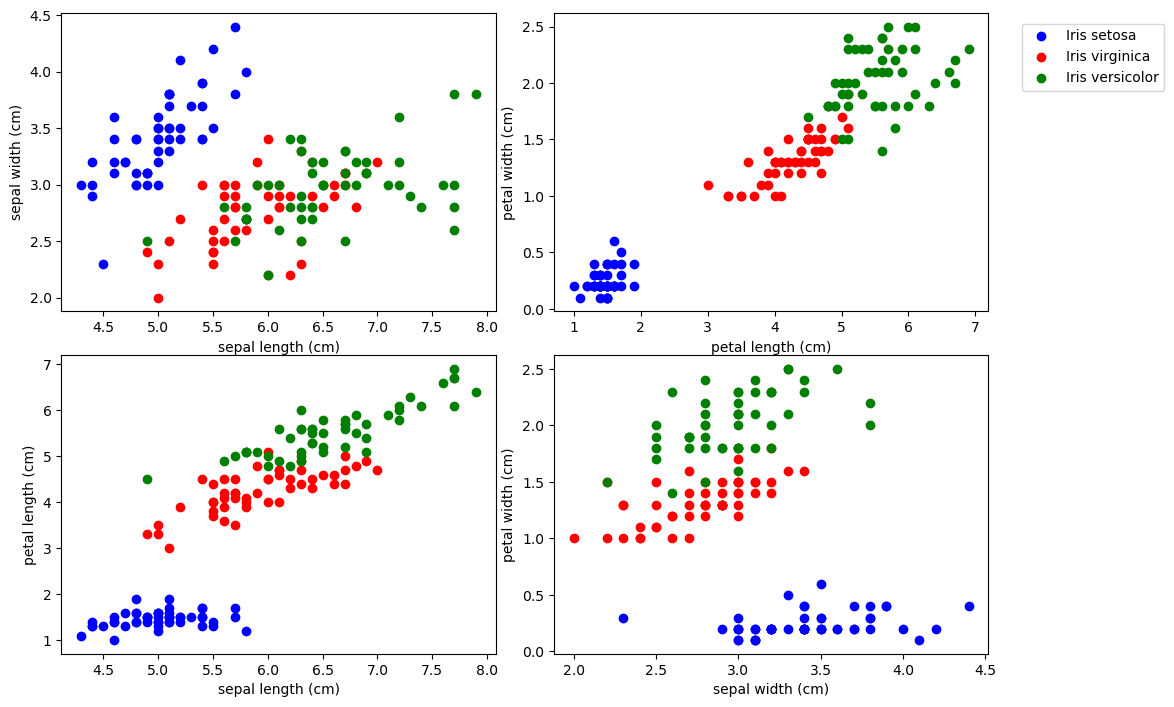

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

### Creating Dataset

In [9]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [11]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.item())
    print(f"epoch : {epoch+1}/{num_epochs} loss : {loss.item()} ")
        #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch : 1/100 loss : 1.1507114171981812 
epoch : 2/100 loss : 1.1166610717773438 
epoch : 3/100 loss : 1.0874042510986328 
epoch : 4/100 loss : 1.0641883611679077 
epoch : 5/100 loss : 1.0432250499725342 
epoch : 6/100 loss : 1.0236353874206543 
epoch : 7/100 loss : 1.0051639080047607 
epoch : 8/100 loss : 0.9889662861824036 
epoch : 9/100 loss : 0.9738516211509705 
epoch : 10/100 loss : 0.9566181898117065 
epoch : 11/100 loss : 0.9377314448356628 
epoch : 12/100 loss : 0.9184657335281372 
epoch : 13/100 loss : 0.9003541469573975 
epoch : 14/100 loss : 0.884484589099884 
epoch : 15/100 loss : 0.8706161975860596 
epoch : 16/100 loss : 0.8555073142051697 
epoch : 17/100 loss : 0.8389423489570618 
epoch : 18/100 loss : 0.8221998810768127 
epoch : 19/100 loss : 0.8063933849334717 
epoch : 20/100 loss : 0.7923727631568909 
epoch : 21/100 loss : 0.7798256278038025 
epoch : 22/100 loss : 0.7679059505462646 
epoch : 23/100 loss : 0.7558663487434387 
epoch : 24/100 loss : 0.7429794669151306 
ep

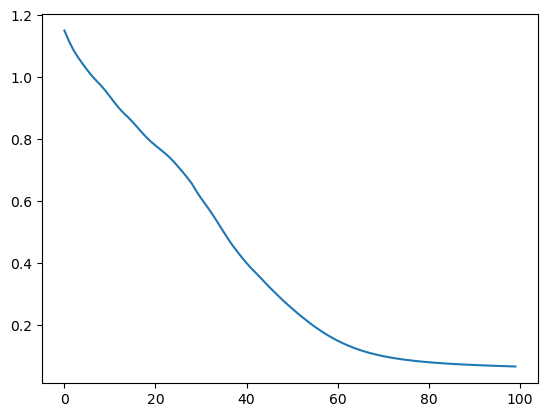

In [14]:
plt.plot(losses)

In [16]:
#turn of autograd
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [17]:
loss

tensor(0.0581)

In [23]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}.) {str(y_val.argmax().item())} {y_test[i]}")
        if y_val.argmax().item() == y_test[i]:
            correct += 1

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2


In [21]:
print(correct/len(y_test))

1.0


In [24]:
torch.save(model.state_dict(),"my_iris_model.pt")

In [28]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [29]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

### To save entire architechture, dont use .state_dict()

In [30]:
torch.save(model,"my_iris_model_whole.pt")

In [31]:
whole_model = torch.load("my_iris_model_whole.pt")

In [32]:
whole_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

### Custom point

In [33]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [36]:
with torch.no_grad():
    print(model.forward(mystery_iris).argmax().item())

0
